<a href="https://colab.research.google.com/github/hwangsae91/project_so/blob/master/exploration/221018/%5BExp_10%5D20221018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# exploration 15번째 과제
@ 황한용(3기/쏘카)

## 기획

### 개요

2022년 5월 10일부로 청와대의 전면개방으로 인하여 청와대 뒷산 등산로도 일부개방에서 완전개방으로 전환되었다.<br>
청와대 주변 둘래길과 뒷산을 합쳐서 한양도성 탐방로(혹은 둘래길이라고도 불리고있다)라고 불리는 이곳은<br>
유네스코 세계문화유산 신청자격인 잠정목록에 등재될만큼 역사적으로 가치가 있으며 밤의 야경이 수려하다.<br>
국내에서는 서울에 여행을 가고 시간이 있다면 추천할만한 곳이지만 아쉽게도 외국인에게는 많이 알려지지 않은 명소이기도 하다.<br>
여행에 관한 유명한 사이트 중 한 곳인 트립어드바이저라는 사이트를 살펴보면<br>
한양도성 탐방로가 아니라 그 코스 중 한곳인 인왕산만 간신히 84위로 올라가있는 것을 확인하였다.<br>
평점은 좋지만 대한민국, 서울이라는 카테고리를 클릭했을때 1페이지에 나오지 않는 것은<br>
해당 명소가 실제에 비해 저평가 된다고 생각한다.<br>
해당 사이트에 나와있는 정보를 아래의 사진으로 켑처하였다.<br>
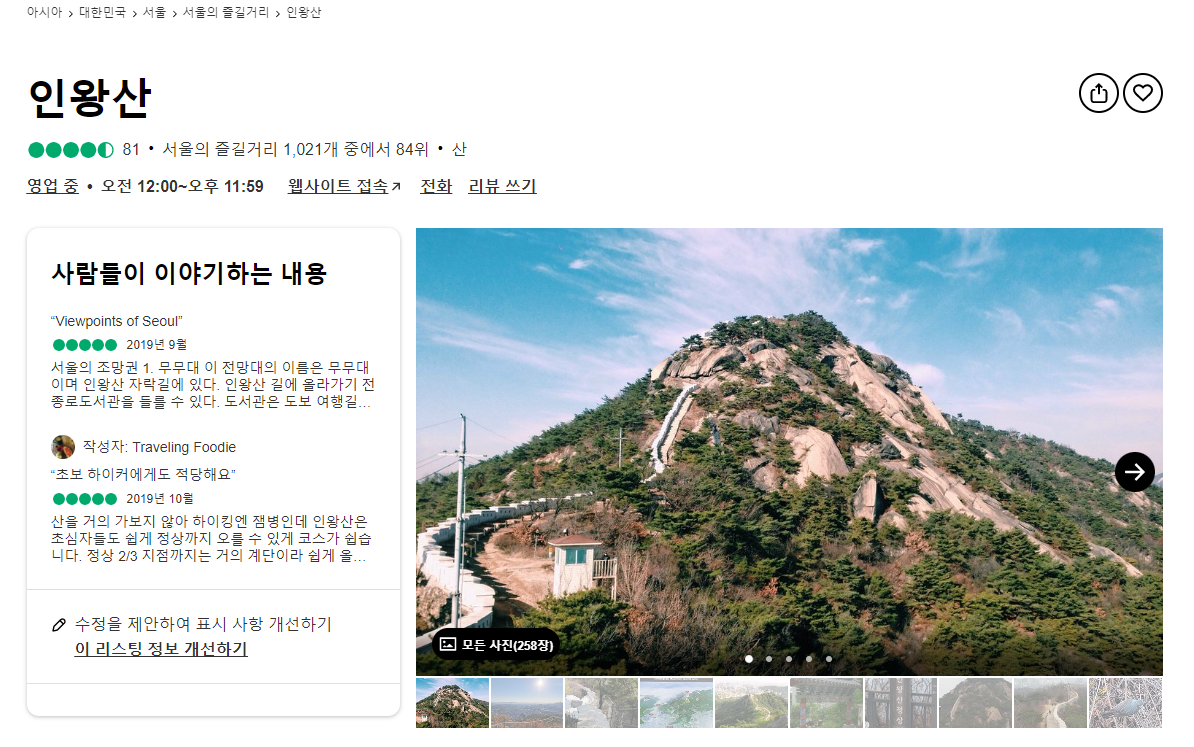

여기에 대해서 여러 원인이 있지만 그 중 하나가 외국인 관광객이 각 명소에 들렸을경우<br>
관련 명소에 대한 내용들을 담은 여러 표지들이나 비석들이 한국어로만 써있는 경우가 대다수이기 때문이라고 생각한다.<br>
그러므로 한글을 다른 언어로 번역해주는 <br>

## 라이브러리 선언

In [ ]:
import matplotlib.pyplot as plt
import keras_ocr

## 상수선언

In [ ]:
BASE_PATH = os.getenv('HOME') + "/aiffel/recommendata_iu/data/ml-1m" # 기본 데이터경로
MF_P_DATA_PATH = BASE_PATH + "/ratings.dat" # 영화에 관한 사용자의 평가가 들어가있는 데이터경로
MF_Q_DATA_PATH = BASE_PATH + "/movies.dat"# 영화에 관한 특성데이터가 들어가있는 데이터경로
MF_P_COLS = ['user_id', 'movie_id', 'counts', 'timestamp'] # 영화에 관한 사용자의 특성(MF model P feature)
MF_Q_COLS = ['movie_id', 'title', 'genre']  # 영화에 관한 특성데이터(MF model feature)
READ_CSV_KWARGS = dict(
    sep='::'
    , encoding='ISO-8859-1'
)

## 함수

속도의 문제로 인하여 소스코드를 변경하였다.<br>
불용어 제거까지 적용시 늦어도 30초내외로 걸린다.<br>

## 메인

### 전처리

In [ ]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
  'https://source.unsplash.com/M7mu6jXlcns/640x460',
  'https://source.unsplash.com/6jsp4iHc8hI/640x460',
  'https://source.unsplash.com/98uYQ-KupiE',
  'https://source.unsplash.com/j9JoYpaJH3A',
  'https://source.unsplash.com/eBkEJ9cH5b4'
]

images = [keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

미리 학습된 가중치가 있는 파이프라인 로드 후<br>
예제 이미지를 파이프라인에 입력<br>
파이프라인에 입력한 사진을 시각화<br>


In [ ]:
orginal_data_size = len(ratings)
ratings = ratings[ratings['ratings'] > 2]
filtered_data_size = len(ratings)

print(
    f"""orginal_data_size: {orginal_data_size}, filtered_data_size: {filtered_data_size}
Ratio of Remaining Data is {filtered_data_size / orginal_data_size:.2%}"""
)

평점 3점 이하의 데이터는 모두 drop한다.<br>
그 후 로드시의 데이터와 filtering한 데이터의 수, filtering한 데이터의 %를 확인한다.

In [ ]:
movies = pd.read_csv(
    MF_Q_DATA_PATH
    , names=MF_Q_COLS
    , **READ_CSV_KWARGS
)
movies.head()

기사는 불용어 제거, 요약은 불용어 제거하지 않은 상태로 전처리를 하며<br>
전처리로 인하여 인하여 생긴 빈 문자열은 제거한다.

In [ ]:
num_user = data['user_id'].nunique()
num_artist = data['artist'].nunique()

csr_data = scipy.sparse.csr_matrix((data.play, (data.user_id, data.artist)), shape= (num_user, num_artist))
csr_data

In [ ]:
text_max_len = 60
headlines_max_len = 8

text_len = [len(s.split()) for s in data['text']]
headlines_len = [len(s.split()) for s in data['headlines']]

print(f"텍스트의 최소 길이 : {np.min(text_len)}")
print(f"텍스트의 최대 길이 : {np.max(text_len)}")
print(f"텍스트의 평균 길이 : {np.mean(text_len)}")
print(f"요약의 최소 길이 : {np.min(headlines_len)}")
print(f"요약의 최대 길이 : {np.max(headlines_len)}")
print(f"요약의 평균 길이 : {np.mean(headlines_len)}")

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('text')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('headlines')
plt.tight_layout()
plt.show()

plt.title('text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

below_threshold_len(text_max_len, data['text'])
below_threshold_len(headlines_max_len,  data['headlines'])

기사와 요약의 최소, 최대, 평균 길이와 길이 분포를 시각화함.

In [ ]:
data = data[data['text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['headlines'].apply(lambda x: len(x.split()) <= headlines_max_len)]

In [ ]:
data['decoder_input'] = SOS_TOKEN + " " + data['headlines']
data['decoder_target'] = data['headlines'] + " " +EOS_TOKEN

In [ ]:
encoder_input = np.array(data['text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블

In [ ]:
# index shuffle
news_max_len = encoder_input.shape[0]
news_valid_len = int(news_max_len * 0.2)

shuffle_idx  = np.arange(news_max_len)
np.random.shuffle(shuffle_idx)

encoder_input = encoder_input[shuffle_idx]
decoder_input = decoder_input[shuffle_idx]
decoder_target = decoder_target[shuffle_idx]

# 학습과 테스트, 점증 데이터 분리

encoder_input_train = encoder_input[:-news_valid_len]
decoder_input_train = decoder_input[:-news_valid_len]
decoder_target_train = decoder_target[:-news_valid_len]

encoder_input_test = encoder_input[-news_valid_len:]
decoder_input_test = decoder_input[-news_valid_len:]
decoder_target_test = decoder_target[-news_valid_len:]

In [ ]:
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

In [ ]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print(f"단어 집합(vocabulary)의 크기 : {total_cnt}", )
print(f"등장 빈도가 {threshold - 1}번 이하인 희귀 단어의 수: {rare_cnt}")
print(f"단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 {total_cnt - rare_cnt}")
print(f"단어 집합에서 희귀 단어의 비율: {(rare_cnt / total_cnt)*100}")
print(f"전체 등장 빈도에서 희귀 단어 등장 빈도 비율: {(rare_freq / total_freq)*100}")

In [ ]:
src_vocab = 8000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 8,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성

# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

In [ ]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [ ]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print(f"단어 집합(vocabulary)의 크기 : {total_cnt}", )
print(f"등장 빈도가 {threshold - 1}번 이하인 희귀 단어의 수: {rare_cnt}")
print(f"단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 {total_cnt - rare_cnt}")
print(f"단어 집합에서 희귀 단어의 비율: {(rare_cnt / total_cnt)*100}")
print(f"전체 등장 빈도에서 희귀 단어 등장 빈도 비율: {(rare_freq / total_freq)*100}")

In [ ]:
tar_vocab = 2000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

In [ ]:
drop_train = set([index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1])
drop_test = set([index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1])

print(f"삭제할 훈련 데이터의 개수 : {len(drop_train)}")
print(f"삭제할 테스트 데이터의 개수 : {len(drop_test)}")

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print(f"훈련 데이터의 개수 : {len(encoder_input_train)}")
print(f"훈련 레이블의 개수 : {len(decoder_input_train)}")
print(f"테스트 데이터의 개수 : {len(encoder_input_test)}")
print(f"테스트 레이블의 개수 : {len(decoder_input_test)}")

In [ ]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=headlines_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headlines_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headlines_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headlines_max_len, padding='post')

### 모델 설계

In [ ]:
# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, EMBEDDING_DIM)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(HIDDEN_SIZE, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(HIDDEN_SIZE, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
# encoder_lstm2 = LSTM(HIDDEN_SIZE, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm2 = LSTM(HIDDEN_SIZE, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
# encoder_lstm3 = LSTM(HIDDEN_SIZE, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm3 = LSTM(HIDDEN_SIZE, return_state=True, return_sequences=True, dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [ ]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, EMBEDDING_DIM)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(HIDDEN_SIZE, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(HIDDEN_SIZE, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

In [ ]:
# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

In [ ]:
fit_kwargs['validation_data'] = ([encoder_input_test, decoder_input_test], decoder_target_test)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005)
    , loss="sparse_categorical_crossentropy", metrics=['acc']
)
history = model.fit(
            x=[encoder_input_train, decoder_input_train]
            , y=decoder_target_train
            , **fit_kwargs).history

history_dict = model.fit(
                         x=[encoder_input_train, decoder_input_train]
                         , y=decoder_target_train
                         , **fit_kwargs).history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epoch = range(1, len(loss) + 1)

plt.plot(epoch, loss, 'bo', label='Training loss')
plt.plot(epoch, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

학습결과 우하향하는 그래프의 모습을 보이며 train loss, validation loss 의 차이가 크지않다.

### 검증


In [ ]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [ ]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(HIDDEN_SIZE,))
decoder_state_input_c = Input(shape=(HIDDEN_SIZE,))

dec_emb_infer_enc = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
(
    decoder_outputs_infer_enc
    , state_h_infer_enc
    , state_c_infer_enc
) = decoder_lstm(dec_emb_infer_enc, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [ ]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, HIDDEN_SIZE))
attn_out_inf = attn_layer([decoder_outputs_infer_enc, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs_infer_enc, attn_out_inf])

# 디코더의 출력층
decoder_outputs_infer_dec = decoder_softmax_layer(decoder_inf_concat)

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs_infer_dec] + [state_h2, state_c2])

print('=3')

In [ ]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

In [ ]:
text = requests.get('http://rare-technologies.com/the_matrix_synopsis.txt').text
print('Summary:')
print(summarize(text, ratio=0.005))

### 회고


- 학습된 데이터가 전체적으로 높은 정확도를 보여 미리 학습된 데이터의 중요성을 알게되었다.
- 항상 학습된 데이터가 높은 정확도를 나타내는 것이 아니라 하이퍼파라미터의 튜닝에 따라 결과가 달라질 수 있다는 것을 알게 되었다.

※ 이번 레포트는 양희성님의 모델구조의 조언으로 작성되었음을 알려드립니다.<br>
   희성님에게 감사하다는 글을 남기며 이만 글을 마치겠습니다.